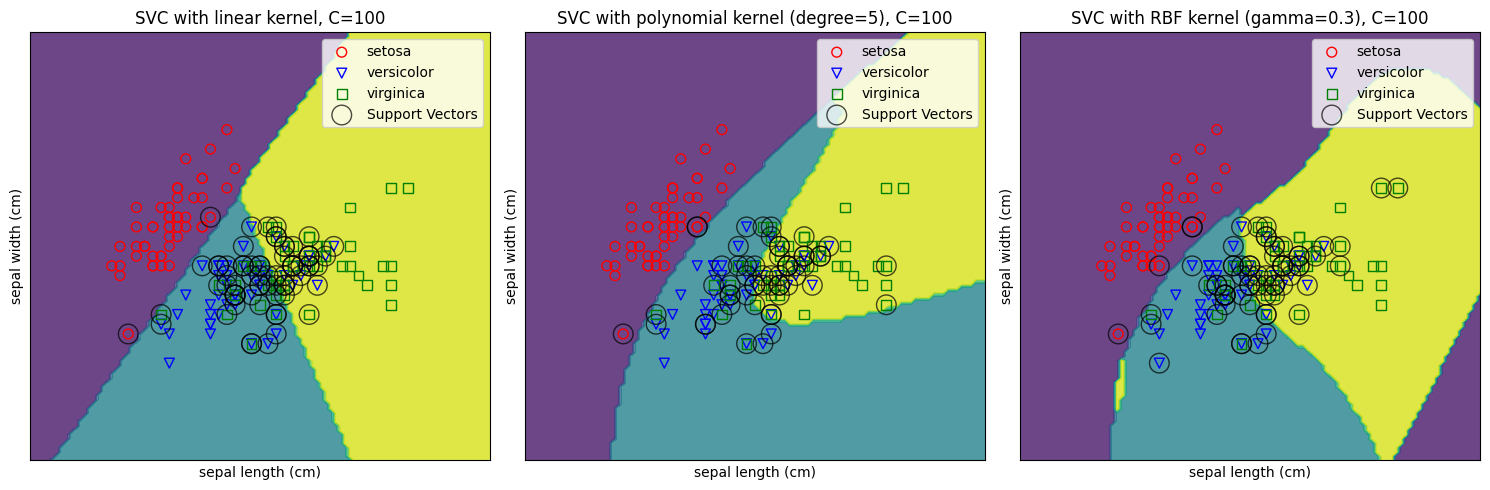

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
models = (
    svm.SVC(kernel="linear", C=100),
    svm.SVC(kernel="poly", degree=5, C=100),
    svm.SVC(kernel="rbf", gamma=0.3, C=100),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel, C=100",
    "SVC with polynomial kernel (degree=5), C=100",
    "SVC with RBF kernel (gamma=0.3), C=100",
)

fig, ax = plt.subplots(1, len(titles), figsize=(15, 5))

X0, X1 = X[:, 0], X[:, 1]

markers = "ovs"
for clf, title, ax in zip(models, titles, np.atleast_1d(ax).flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.viridis,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    for i, color in zip(clf.classes_, "rbg"):
        ax.scatter(X0[y == i], X1[y == i], s=50, edgecolors=color, marker=markers[i], facecolor='none', label=iris.target_names[i])

    # highlight the support vectors
    sv = clf.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], s=200, facecolors="none", edgecolors="k", alpha=0.7, label="Support Vectors")

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()

fig.tight_layout()
plt.show()